# Churn prediction
Churn prediction is common use case in machine learning domain. Churn means "leaving the company". It is very critical for business to have an idea about why and when customers are likely to churn. Having a robust and accurate churn prediction model helps businesses to take actions to prevent customers from leaving the company.



# Import the libraries

In [5]:
import warnings
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df1 = pd.read_csv("TelcomCustomer-Churn_1.csv",skipinitialspace=True)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [7]:
df1.shape

(7043, 10)

In [8]:
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv",skipinitialspace=True)
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df2.shape

(7043, 12)

In [10]:
df=pd.merge(df1, df2, on="customerID")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.shape

(7043, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleansing 

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum().sum()

11

In [15]:
null_percentage= df.isnull().sum()/len(df.index)
null_percentage = round(100*(null_percentage),2)
null_percentage

customerID          0.00
gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
MultipleLines       0.00
InternetService     0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
PaperlessBilling    0.00
PaymentMethod       0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum().sum()

0

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.columns



Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df_val_counts = pd.DataFrame(df[['Partner', 'Dependents', 'PhoneService',  'PaperlessBilling']].value_counts())
df_val_counts

0
Partner Dependents PhoneService PaperlessBilling      
No      No         Yes          Yes               1797
                                No                1156
Yes     No         Yes          Yes               1006
        Yes        Yes          Yes                817
                                No                 763
        No         Yes          No                 498
No      No         No           Yes                204
        Yes        Yes          Yes                162
                                No                 153
        No         No           No                 123
Yes     No         No           Yes                 91
        Yes        No           No                  87
                                Yes                 73
        No         No           No                  58
No      Yes        No           No                  26
                                Yes                 18

In [21]:

df_val_counts = pd.DataFrame(df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','MultipleLines']].value_counts())
df_val_counts

0
OnlineSecurity      OnlineBackup        DeviceProtection    TechSupport         StreamingTV         StreamingMovies     MultipleLines         
No internet service No internet service No internet service No internet service No internet service No internet service No                1180
No                  No                  No                  No                  No                  No                  No                 403
No internet service No internet service No internet service No internet service No internet service No internet service Yes                340
No                  No                  No                  No                  No                  No                  Yes                210
Yes                 Yes                 Yes                 Yes                 Yes                 Yes                 Yes                208
No                  Yes                 Yes                 No                  Yes                 Yes                 Yes                148
                    No                  No                  No                  Yes                 Yes                 Yes                115
                    Yes                 Yes                 Yes                 Yes                 Yes                 Yes                114
                    No                  Yes                 No                  Yes                 Yes                 Yes                114
Yes                 No                  No                  No                  No                  No                  No                  97
No                  No                  No                  No                  Yes                 No                  No                  93
                    Yes                 No                  No                  No                  No                  No                  93
                                                                                                                        Yes                 85
                    No                  No                  No                  No                  Yes                 Yes                 84
                                                                                                                        No                  83
                                                                                Yes                 Yes                 No                  82
                                                                                No                  No                  No phone service    80
                    Yes                 No                  No                  Yes                 Yes                 Yes                 77
                    No                  Yes                 No                  No                  No                  No                  69
Yes                 No                  Yes                 Yes                 Yes                 Yes                 Yes                 67
No                  No                  Yes                 Yes                 Yes                 Yes                 Yes                 66
                                        No                  No                  Yes                 No                  Yes                 66
Yes                 Yes                 Yes                 No                  Yes                 Yes                 Yes                 63
No                  No                  No                  Yes                 No                  No                  No                  57
Yes                 No                  No                  No                  No                  No                  Yes                 57
                    Yes                 No                  No                  No                  No                  No                  53
No                  No                  Yes                 No                  Yes                 Yes                 No               

In [22]:
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[varlist] = df[varlist].apply(binary_map)

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [24]:
df.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541
Partner,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982
Dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128
tenure,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049
PhoneService,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691
PaperlessBilling,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454
MonthlyCharges,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
Churn,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000


# Exploratory Data Analysis

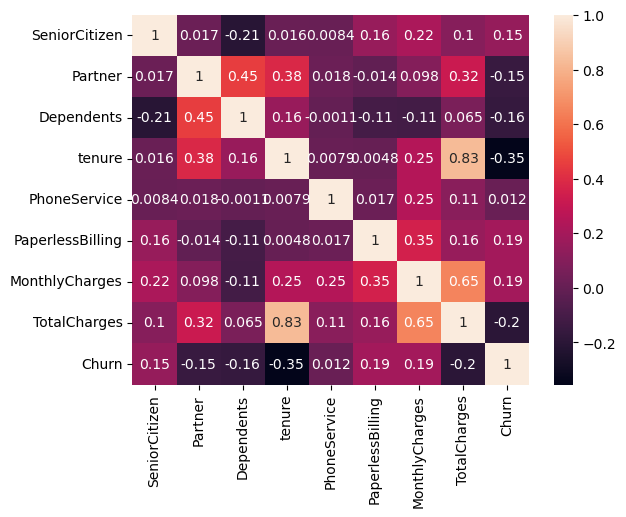

In [25]:
sns.heatmap(df.corr(),annot = True)
plt.show()

#### From above heatmap we can see that Tenure and Toral Charges have high Correlation. We can discard one of these but for now I am not discarding it.

#### Visualising Numeric Variables for better understanding

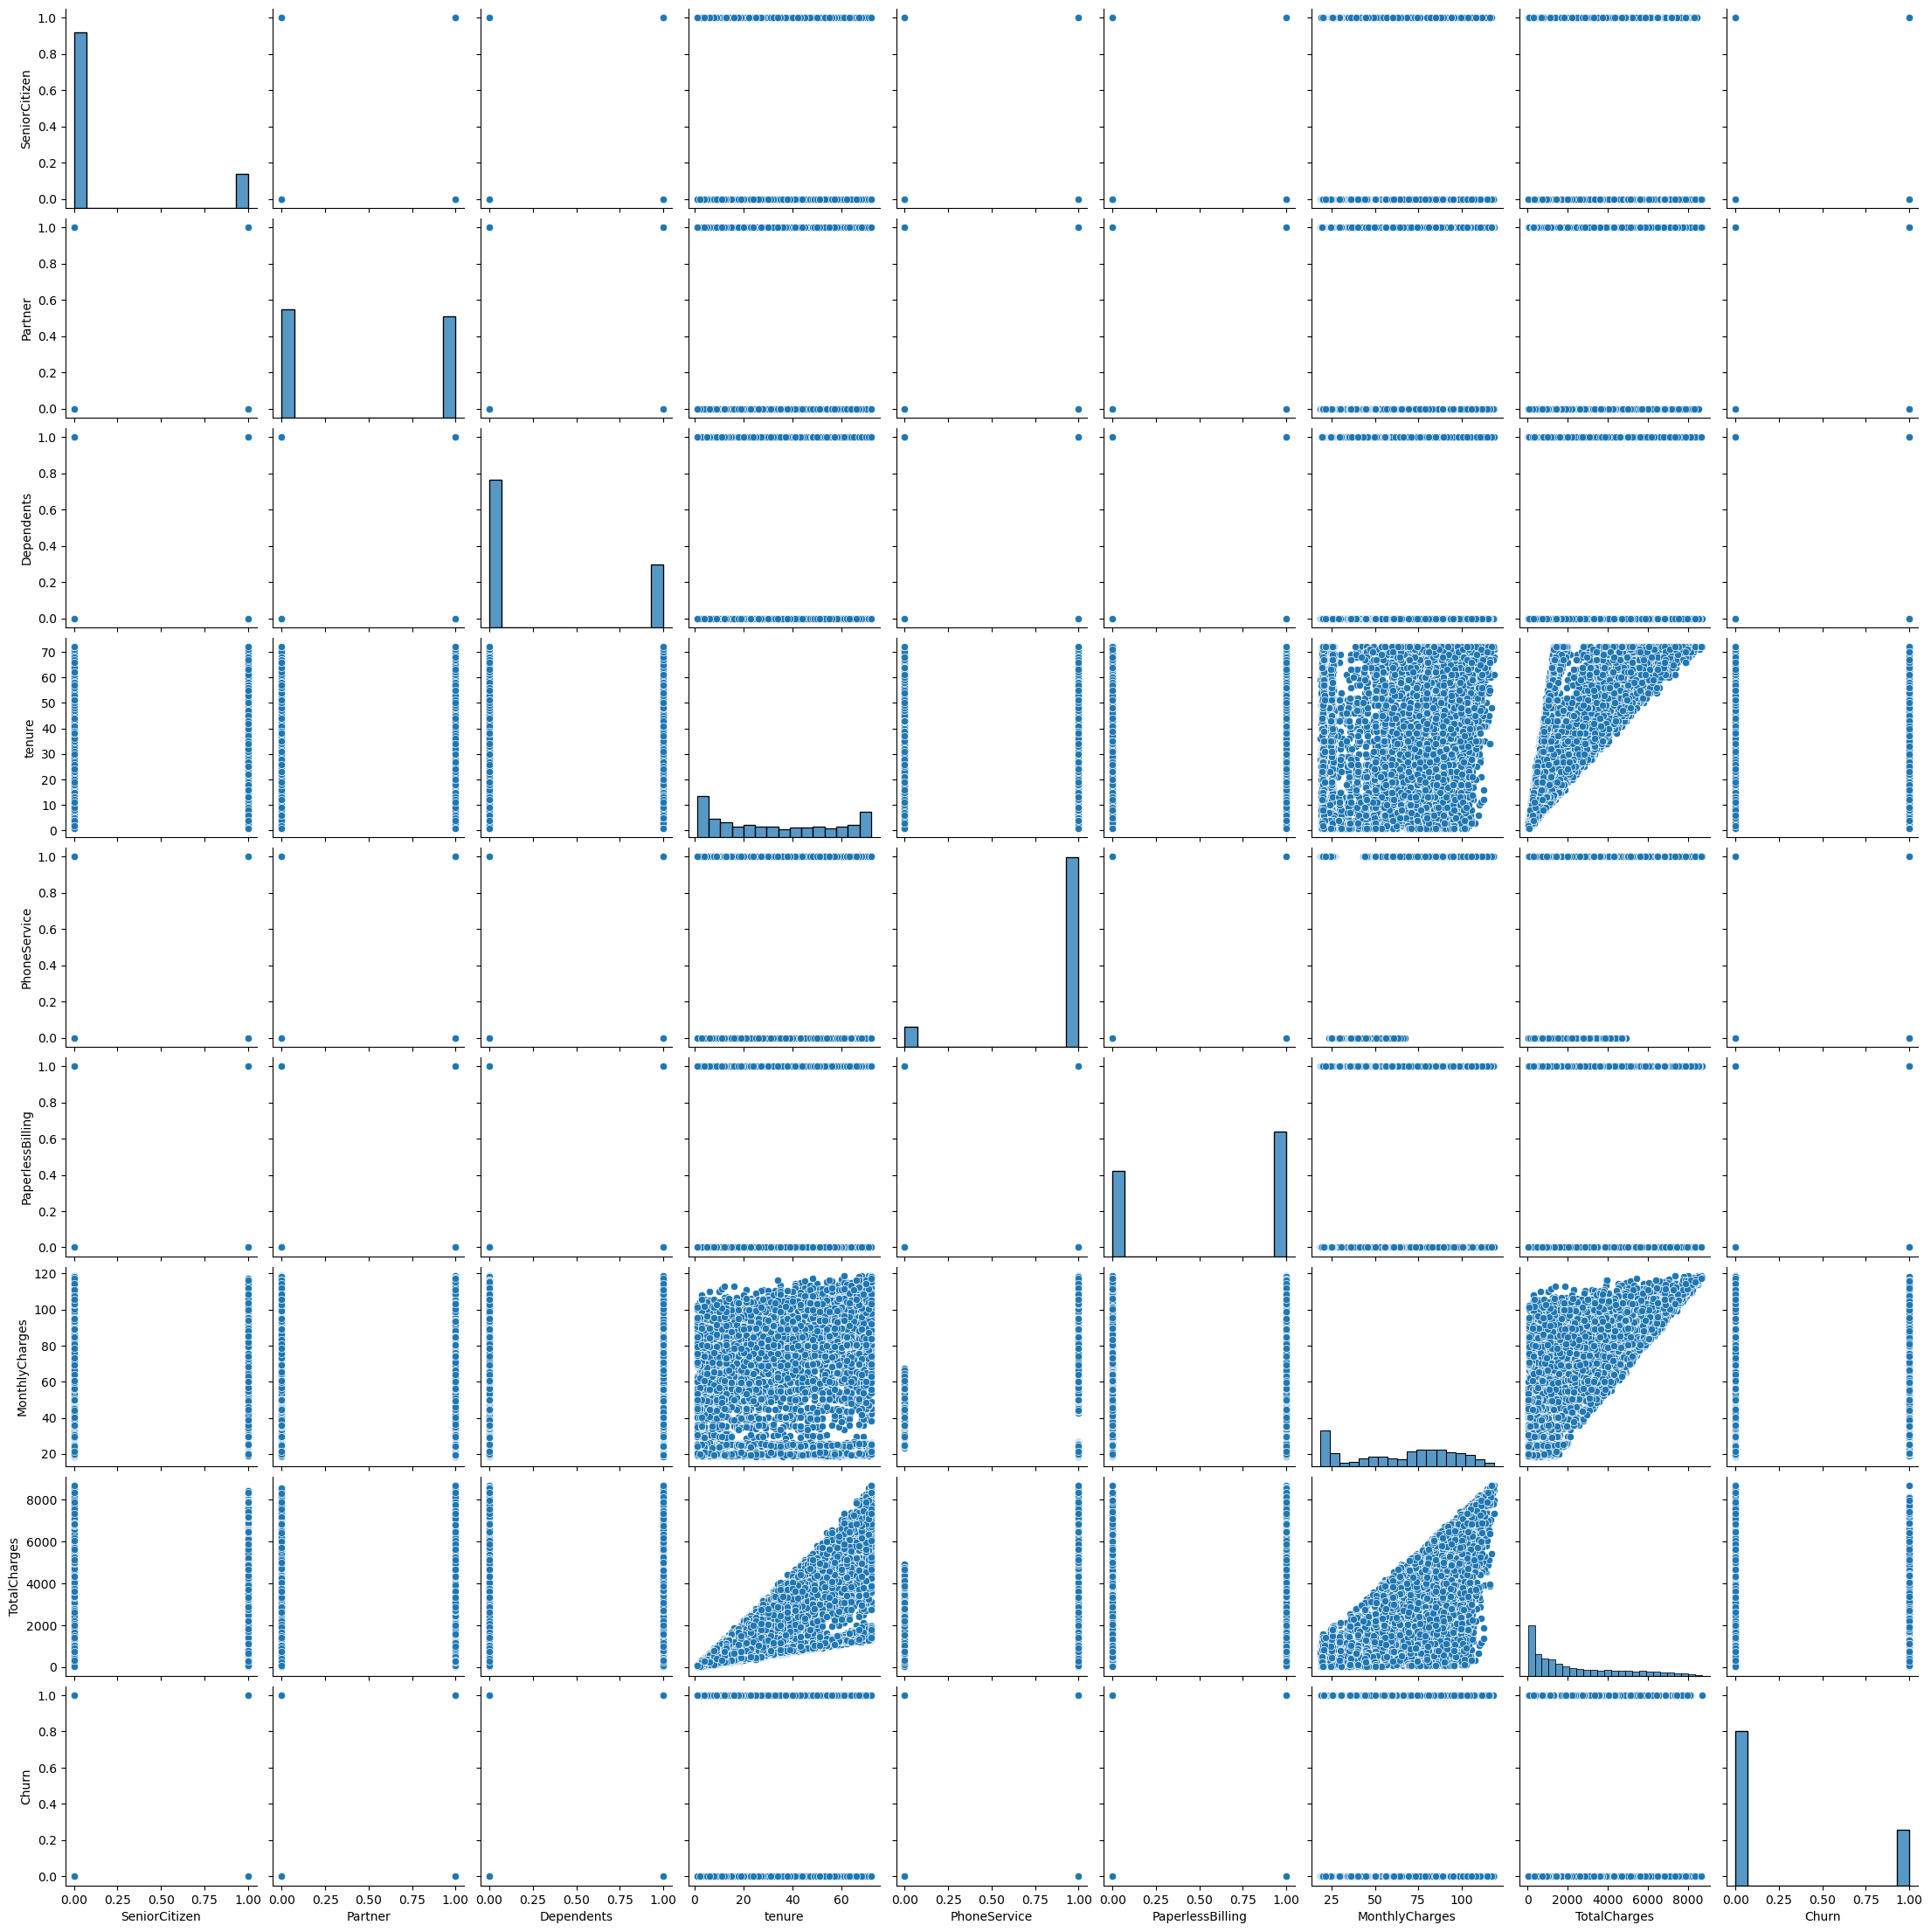

In [26]:
sns.pairplot(df)
plt.show()

 Kind of same is the inferences  that we got from the heatmap

###### Visualising Categorical Variables for their better intrepretation

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


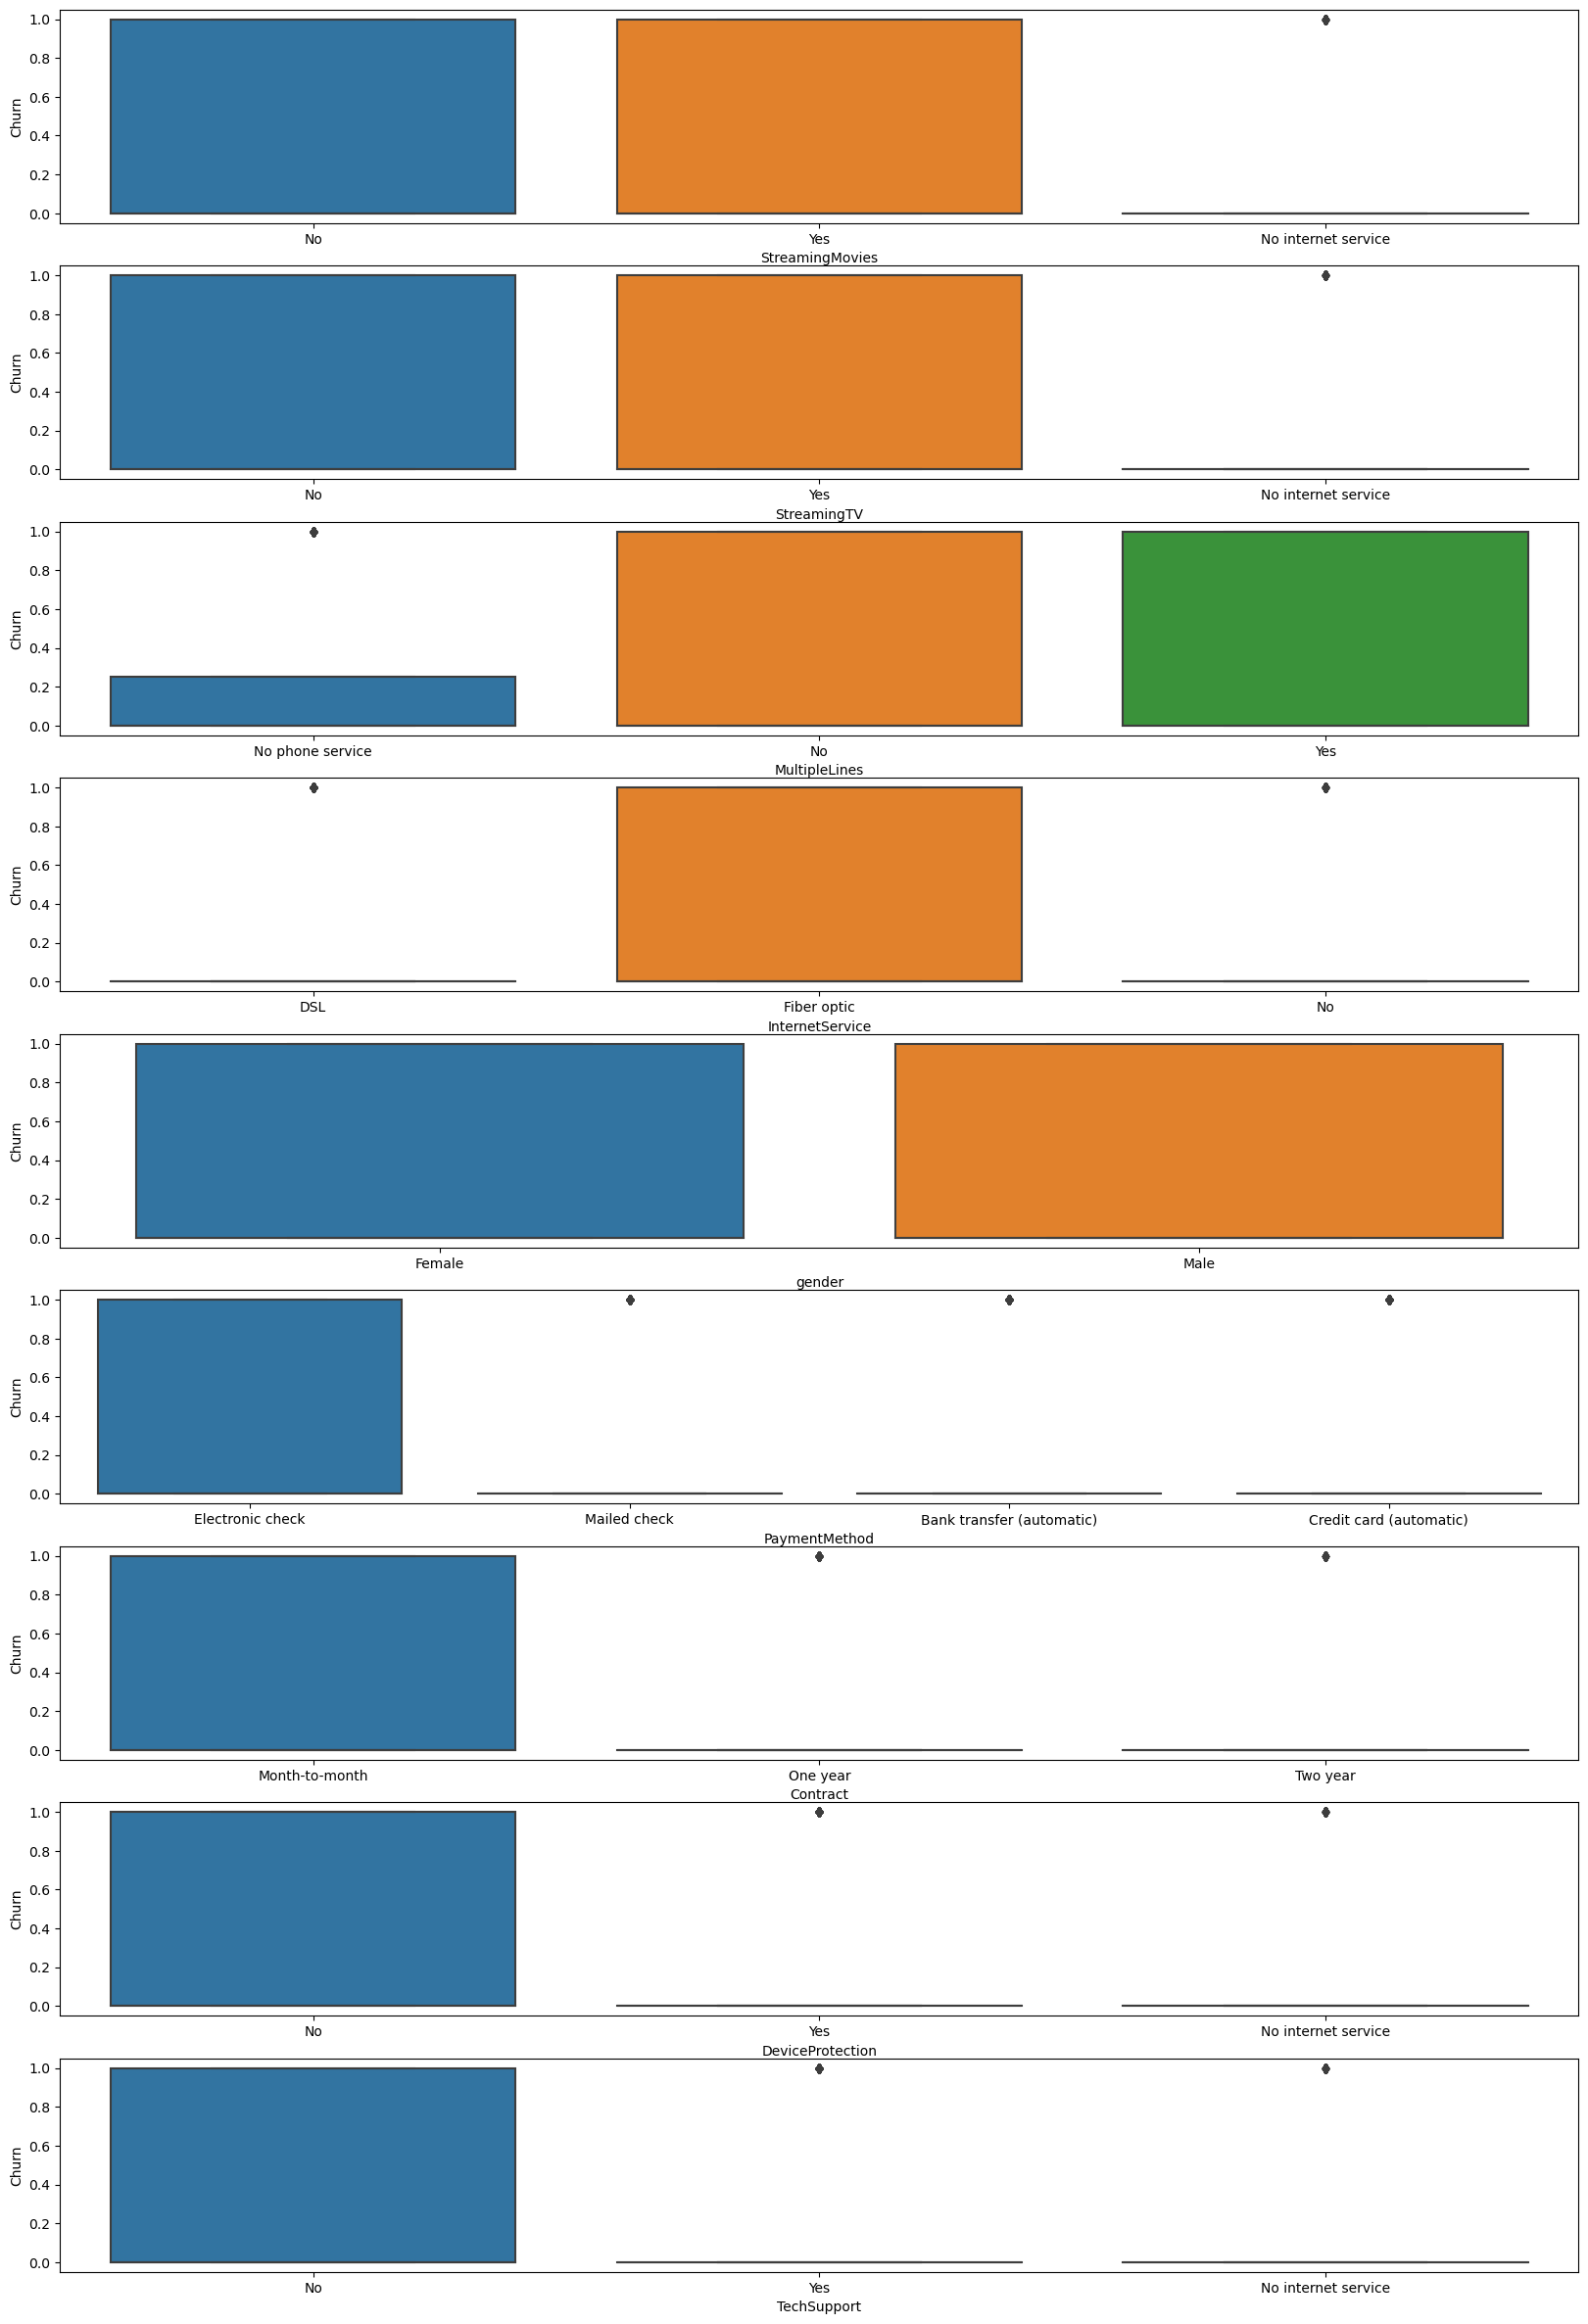

In [29]:
plt.figure(figsize=(20, 30))
plt.subplot(9,1,1)
sns.boxplot(x = 'StreamingMovies', y = 'Churn', data = df)
plt.subplot(9,1,2)
sns.boxplot(x = 'StreamingTV', y = 'Churn', data = df)
plt.subplot(9,1,3)
sns.boxplot(x = 'MultipleLines', y = 'Churn', data = df)
plt.subplot(9,1,4)
sns.boxplot(x = 'InternetService', y = 'Churn', data = df)
plt.subplot(9,1,5)
sns.boxplot(x = 'gender', y = 'Churn', data = df)
plt.subplot(9,1,6)
sns.boxplot(x = 'PaymentMethod', y = 'Churn', data = df)
plt.subplot(9,1,7)
sns.boxplot(x = 'Contract', y = 'Churn', data = df)
plt.subplot(9,1,8)
sns.boxplot(x = 'DeviceProtection', y = 'Churn', data = df)
plt.subplot(9,1,9)
sns.boxplot(x = 'TechSupport', y = 'Churn', data = df)
plt.show()

#### That gave us much better understanding w.r.t churns

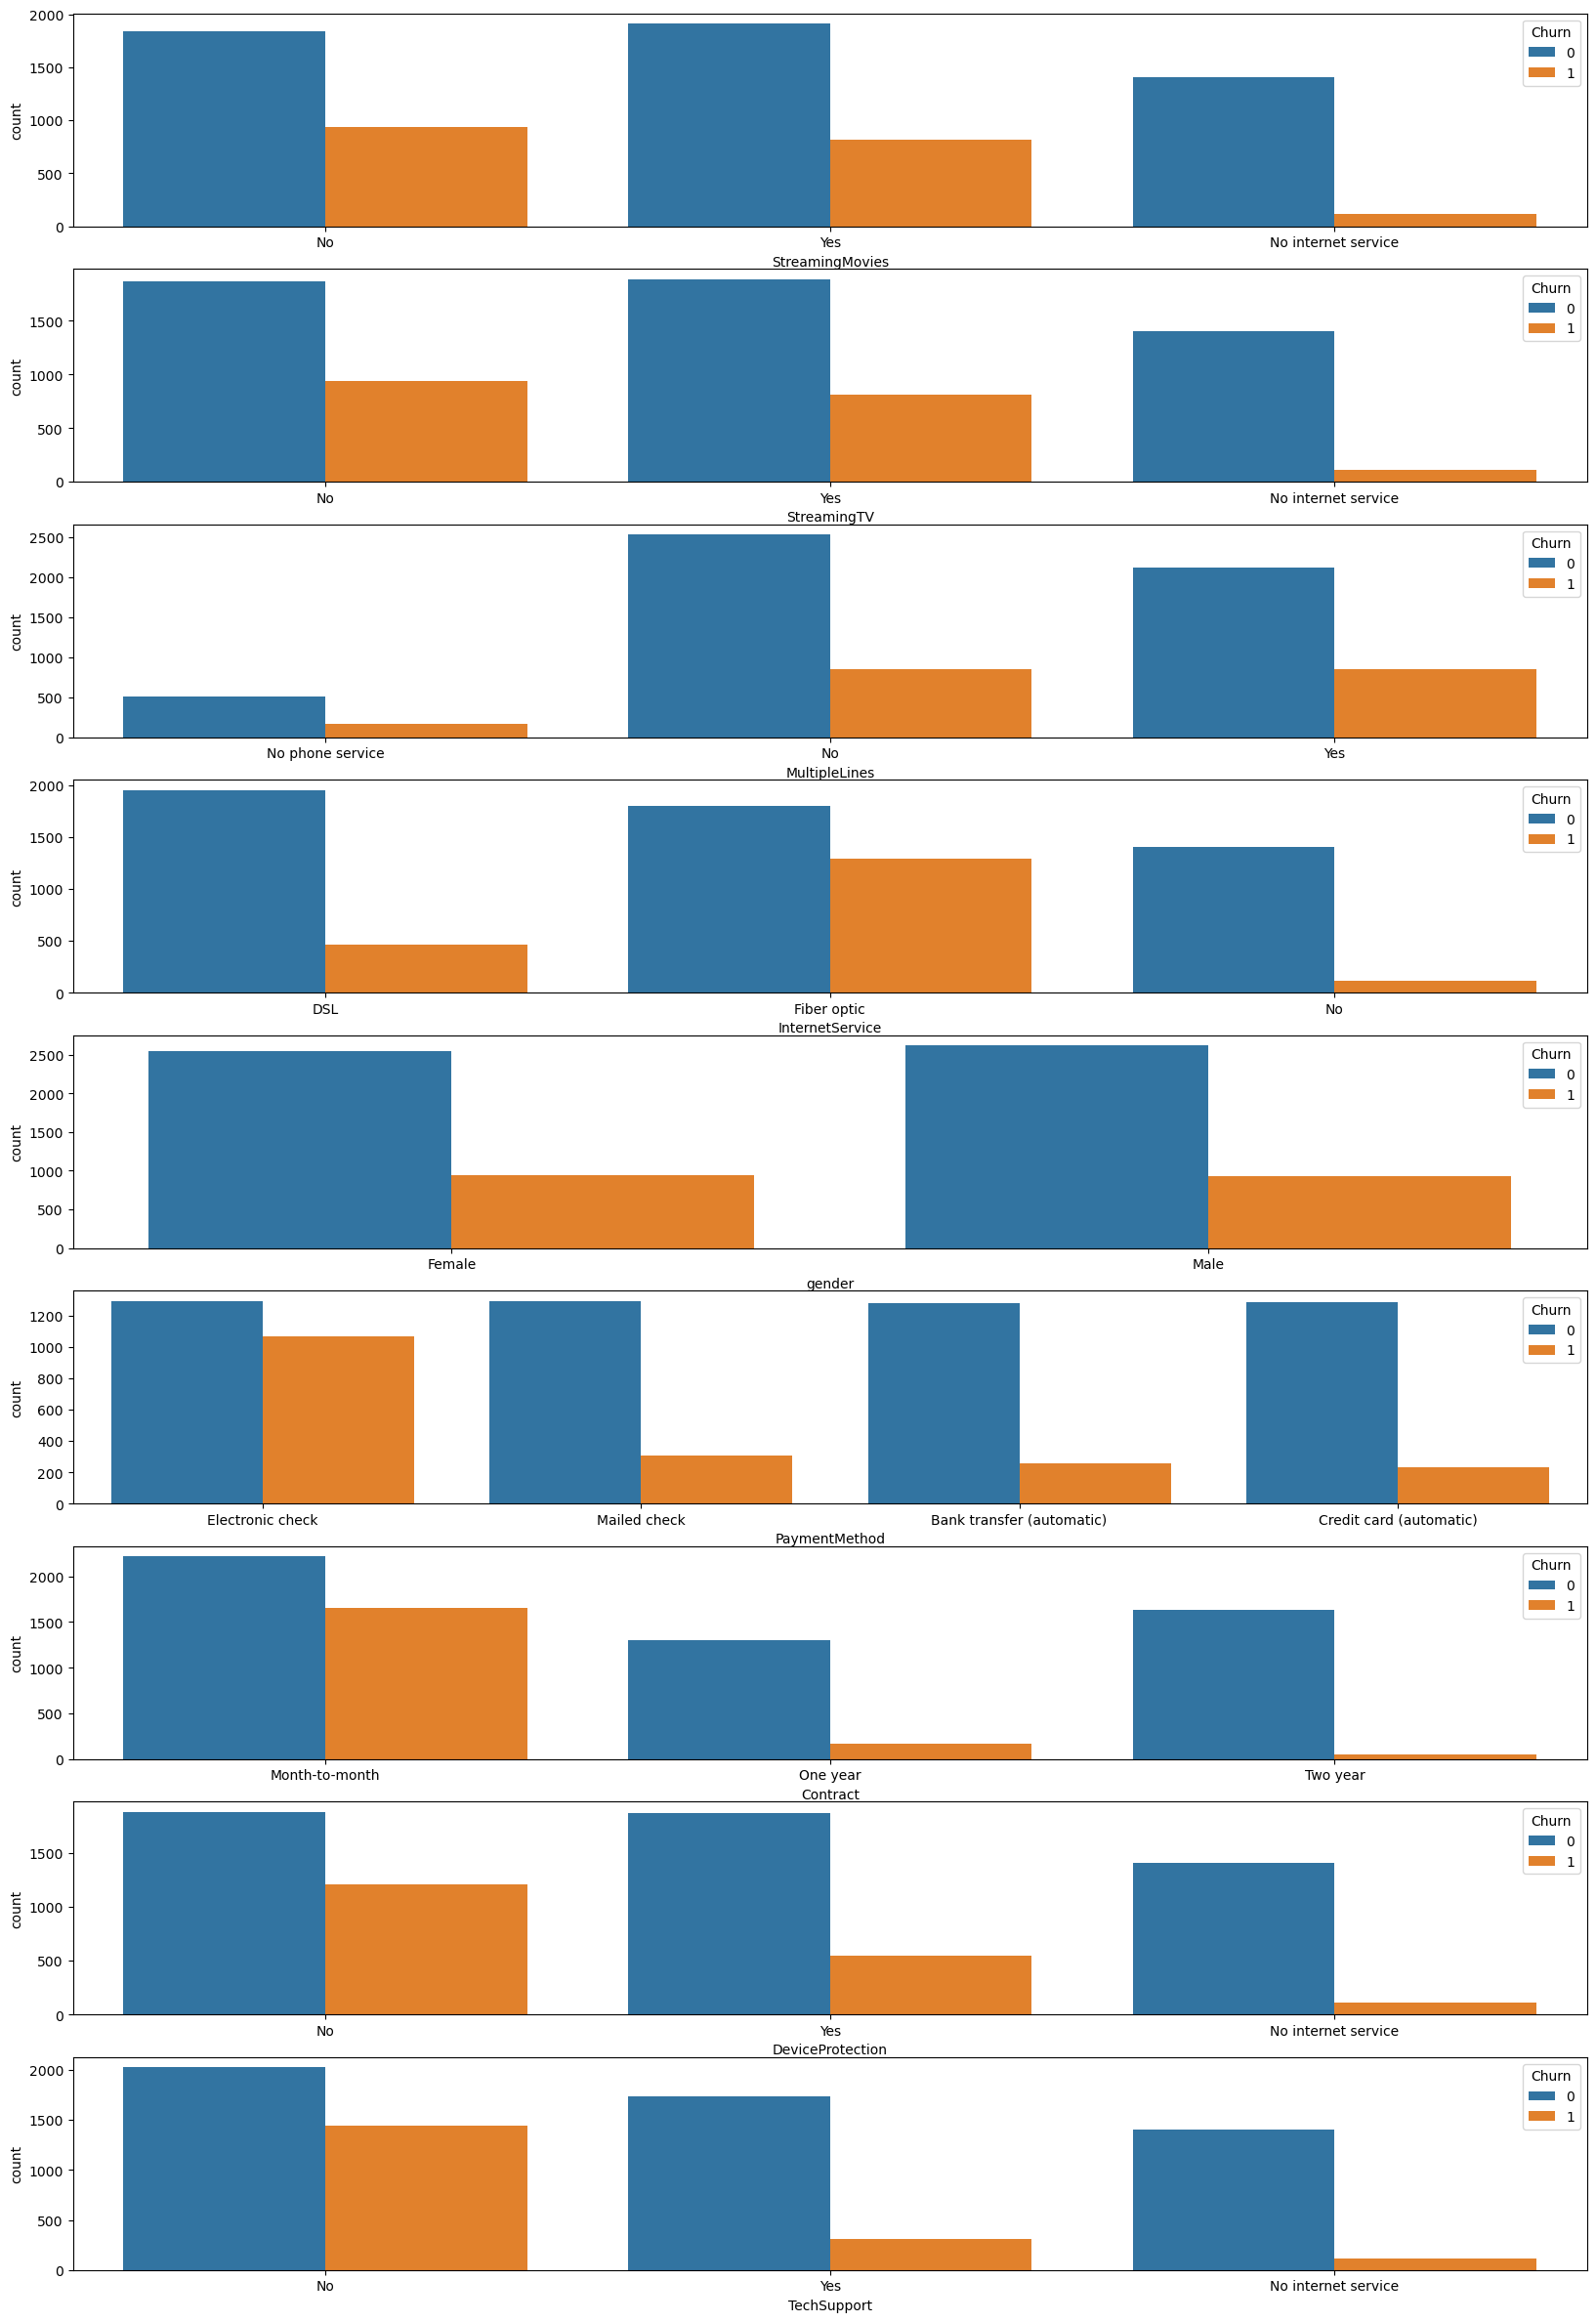

In [30]:
plt.figure(figsize=(20, 30))
plt.subplot(9,1,1)
sns.countplot(x = 'StreamingMovies', hue = 'Churn', data = df)
plt.subplot(9,1,2)
sns.countplot(x = 'StreamingTV', hue = 'Churn', data = df)
plt.subplot(9,1,3)
sns.countplot(x = 'MultipleLines', hue = 'Churn', data = df)
plt.subplot(9,1,4)
sns.countplot(x = 'InternetService', hue = 'Churn', data = df)
plt.subplot(9,1,5)
sns.countplot(x = 'gender', hue = 'Churn', data = df)
plt.subplot(9,1,6)
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = df)
plt.subplot(9,1,7)
sns.countplot(x = 'Contract', hue = 'Churn', data = df)
plt.subplot(9,1,8)
sns.countplot(x = 'DeviceProtection', hue = 'Churn', data = df)
plt.subplot(9,1,9)
sns.countplot(x = 'TechSupport', hue = 'Churn', data = df)
plt.show()

In [31]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,1,0,0,1,0


In [33]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')

ml1 = ml.drop(['MultipleLines_No phone service'], 1)

df = pd.concat([df,ml1], axis=1)


os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)

df = pd.concat([df,os1], axis=1)


ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)


df = pd.concat([df,ob1], axis=1)

 
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)

df = pd.concat([df,dp1], axis=1)


ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)

telecom = pd.concat([df,ts1], axis=1)


st =pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)

telecom = pd.concat([df,st1], axis=1)

 
sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)

df = pd.concat([df,sm1], axis=1)

C:\Users\Shree\AppData\Local\Temp\ipykernel_2928\135075843.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['MultipleLines_No phone service'], 1)
C:\Users\Shree\AppData\Local\Temp\ipykernel_2928\135075843.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  os1 = os.drop(['OnlineSecurity_No internet service'], 1)
C:\Users\Shree\AppData\Local\Temp\ipykernel_2928\135075843.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
C:\Users\Shree\AppData\Local\Temp\ipykernel_2928\135075843.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dp1 = dp.drop(['DeviceProtection_No 

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0


In [35]:
df.shape

(7032, 39)

In [36]:
# since we have created Dummy variables so deleting the repeated variables
df = df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

C:\Users\Shree\AppData\Local\Temp\ipykernel_2928\1106133567.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',


In [37]:
df.head(499)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0
5,9305-CDSKC,0,0,0,8,1,1,99.65,820.50,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6,1452-KIOVK,0,0,1,22,1,1,89.10,1949.40,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0
7,6713-OKOMC,0,0,0,10,0,0,29.75,301.90,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0
8,7892-POOKP,0,1,0,28,1,1,104.80,3046.05,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1
9,6388-TABGU,0,0,1,62,1,0,56.15,3487.95,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0


In [38]:
df.shape

(7032, 28)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

In [40]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,StreamingMovies_No,StreamingMovies_Yes
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,0.209329,0.239619,0.216297,0.336320,0.228100,0.504693,0.440273,0.216155,0.481371,0.421928,0.497298,0.286547,0.438993,0.344852,0.439989,0.343857,0.395478,0.388367
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,0.406858,0.426881,0.411748,0.472483,0.419637,0.500014,0.496455,0.411650,0.499688,0.493902,0.500028,0.452180,0.496300,0.475354,0.496421,0.475028,0.488988,0.487414
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,1.000000,1.000000,1.000000,69.000000,1.000000,1.000000,102.645000,5976.640000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
95%,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,107.422500,6923.590000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,114.734500,8039.883000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop(['Churn','customerID'], axis=1)

X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0


In [43]:
y = df['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

##### Data Preparation for model building

In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1


In [47]:
# Checking the Churn Rate
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
churn

26.578498293515356

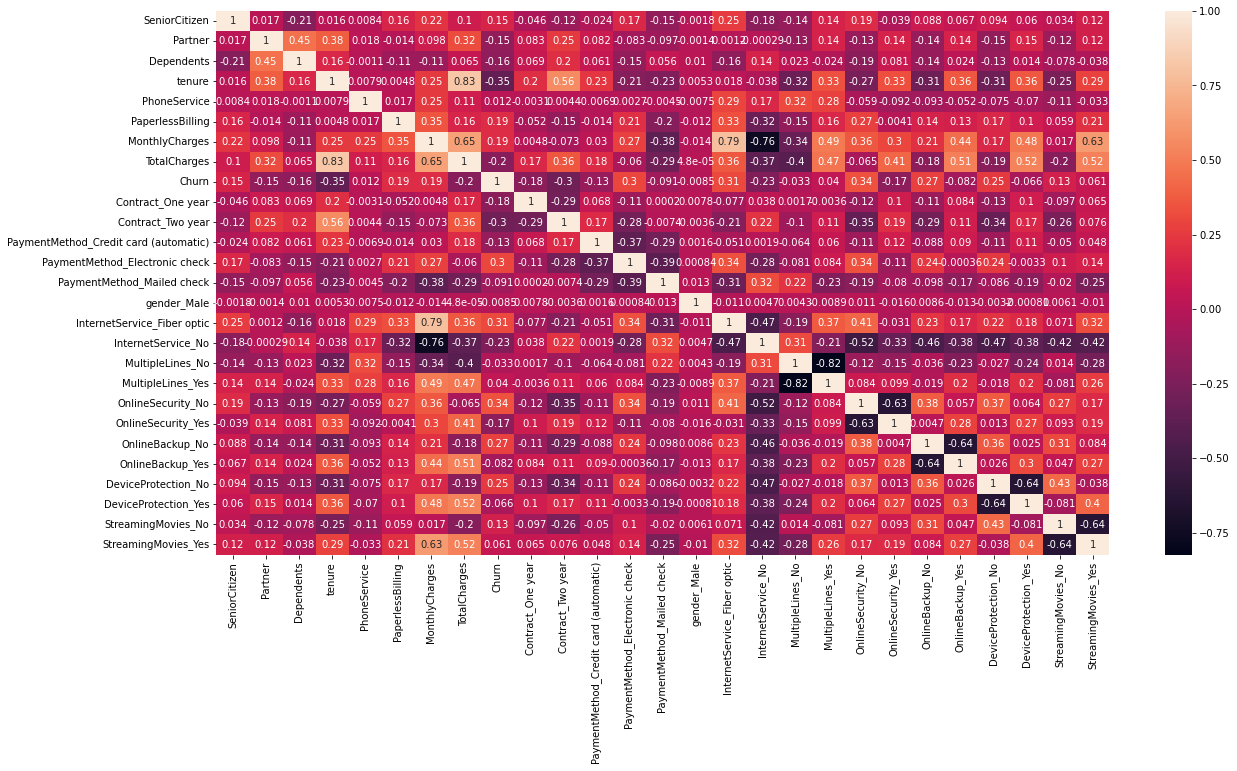

In [44]:
plt.figure(figsize = (20,10))        
sns.heatmap(df.corr(),annot = True)
plt.show()

##### 
Dropping highly correlated dummy variables

In [45]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','StreamingMovies_No'], 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7228\1380492267.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','StreamingMovies_No'], 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7228\1380492267.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','StreamingMovies_No'], 1)


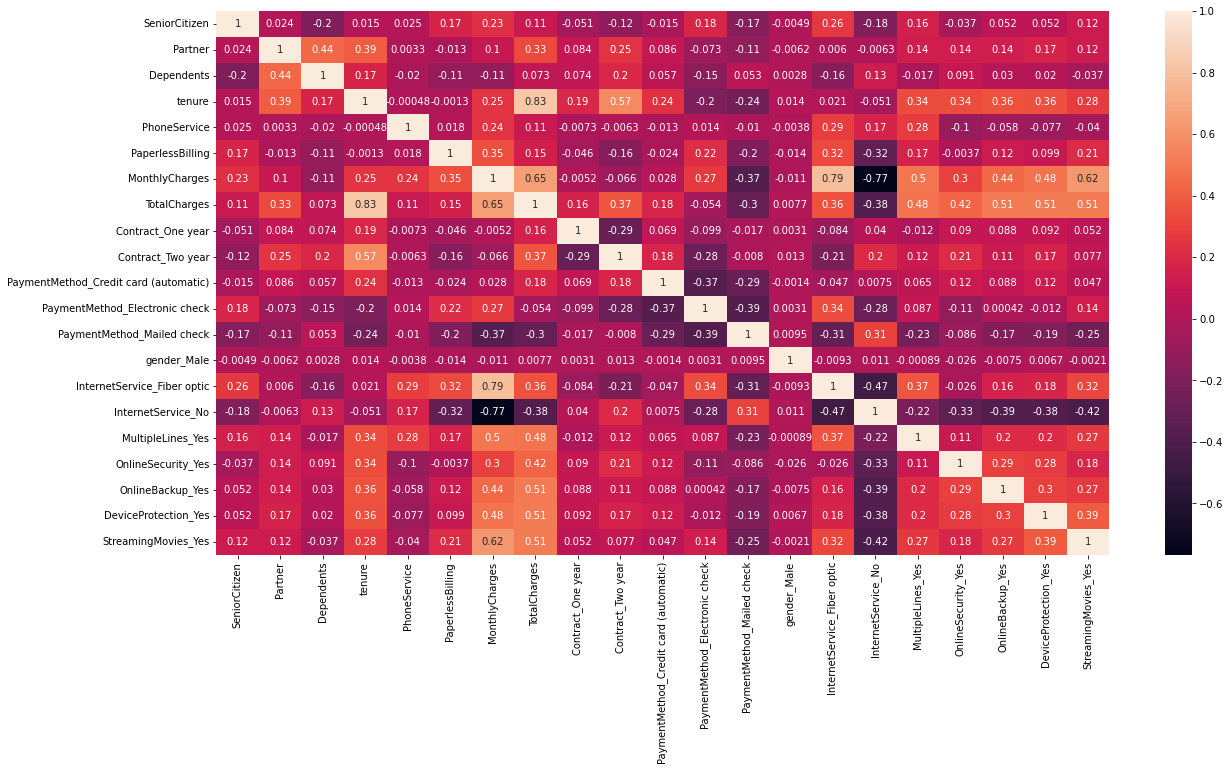

In [46]:
#After dropping highly correlated variables now let's check the correlation matrix again.
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

##### Logistic Regression Model training, and testing

In [47]:
import statsmodels.api as sm

In [48]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4900
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2016.5
Date:                Wed, 25 Jan 2023   Deviance:                       4033.1
Time:                        02:34:05   Pearson chi2:                 6.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2809
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0654      0.362     -2.941      0.003      -1.775      -0.355
SeniorCitizen                             0.4155      0.101      4.115      0.000       0.218       0.613
Partner                                   0.0466      0.093      0.500      0.617      -0.136       0.229
Dependents                               -0.1522      0.107     -1.423      0.155      -0.362       0.057
tenure                                   -1.5142      0.189     -8.017      0.000      -1.884      -1.144
PhoneService                             -0.5612      0.228     -2.459      0.014      -1.008      -0.114
PaperlessBilling                          0.3324      0.090      3.710      0.000       0.157       0.508
MonthlyCharges                            0.0128      0.256      0.050      0.960      -0.489       0.514
TotalCharges                              0.7262      0.197      3.678      0.000       0.339       1.113
Contract_One year                        -0.6906      0.128     -5.382      0.000      -0.942      -0.439
Contract_Two year                        -1.3413      0.211     -6.357      0.000      -1.755      -0.928
PaymentMethod_Credit card (automatic)    -0.2586      0.136     -1.896      0.058      -0.526       0.009
PaymentMethod_Electronic check            0.1861      0.112      1.659      0.097      -0.034       0.406
PaymentMethod_Mailed check               -0.2708      0.137     -1.979      0.048      -0.539      -0.003
gender_Male                              -0.0357      0.078     -0.458      0.647      -0.189       0.117
InternetService_Fiber optic               0.7757      0.235      3.307      0.001       0.316       1.235
InternetService_No                       -0.8591      0.287     -2.992      0.003      -1.422      -0.296
MultipleLines_Yes                         0.2130      0.104      2.048      0.041       0.009       0.417
OnlineSecurity_Yes                       -0.4163      0.110     -3.801      0.000      -0.631      -0.202
OnlineBackup_Yes                         -0.1951      0.101     -1.933      0.053      -0.393       0.003
DeviceProtection_Yes                     -0.0421      0.107     -0.393      0.695      -0.253       0.168
StreamingMovies_Yes                       0.1588      0.142      1.121      0.262      -0.119       0.436
=========================================================================================================
"""

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [50]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [51]:
rfe.support_

array([ True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False])

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 6),
 ('Dependents', False, 3),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 4),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 7),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 5),
 ('StreamingMovies_Yes', False, 2)]

In [53]:
col = X_train.columns[rfe.support_]

In [54]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'MonthlyCharges', 'gender_Male',
       'DeviceProtection_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [55]:
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.2
Date:                Wed, 25 Jan 2023   Deviance:                       4038.4
Time:                        02:34:05   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2801
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0460      0.186     -5.631      0.000      -1.410      -0.682
SeniorCitizen                             0.4410      0.099      4.444      0.000       0.247       0.635
tenure                                   -1.5896      0.180     -8.852      0.000      -1.942      -1.238
PhoneService                             -0.5888      0.160     -3.686      0.000      -0.902      -0.276
PaperlessBilling                          0.3437      0.089      3.850      0.000       0.169       0.519
TotalCharges                              0.8275      0.180      4.608      0.000       0.476       1.179
Contract_One year                        -0.6884      0.127     -5.435      0.000      -0.937      -0.440
Contract_Two year                        -1.3528      0.210     -6.445      0.000      -1.764      -0.941
PaymentMethod_Credit card (automatic)    -0.2611      0.136     -1.917      0.055      -0.528       0.006
PaymentMethod_Electronic check            0.1949      0.112      1.743      0.081      -0.024       0.414
PaymentMethod_Mailed check               -0.2889      0.136     -2.119      0.034      -0.556      -0.022
InternetService_Fiber optic               0.7930      0.116      6.829      0.000       0.565       1.021
InternetService_No                       -0.8910      0.164     -5.436      0.000      -1.212      -0.570
MultipleLines_Yes                         0.2173      0.095      2.279      0.023       0.030       0.404
OnlineSecurity_Yes                       -0.4281      0.102     -4.213      0.000      -0.627      -0.229
OnlineBackup_Yes                         -0.2043      0.092     -2.222      0.026      -0.385      -0.024
=========================================================================================================
"""

In [56]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.176795
5790    0.215780
6498    0.674984
880     0.517350
2784    0.659305
3874    0.435653
5387    0.551289
6623    0.830795
4465    0.201350
5364    0.536519
dtype: float64

In [57]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17679502, 0.21578002, 0.67498381, 0.51735045, 0.65930541,
       0.43565277, 0.55128896, 0.83079543, 0.20135006, 0.53651948])

In [58]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.176795,879
1,0,0.215780,5790
2,1,0.674984,6498
3,1,0.517350,880
4,1,0.659305,2784


In [59]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.176795,879,0
1,0,0.215780,5790,0
2,1,0.674984,6498,1
3,1,0.517350,880,1
4,1,0.659305,2784,1


Checking VIFs

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
X_train[col].shape[1]

15

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,PhoneService,9.34
4,TotalCharges,7.06
1,tenure,6.59
10,InternetService_Fiber optic,3.95
11,InternetService_No,3.10
6,Contract_Two year,3.03
3,PaperlessBilling,2.68
12,MultipleLines_Yes,2.53
8,PaymentMethod_Electronic check,2.52
9,PaymentMethod_Mailed check,2.10


In [63]:
col = col.drop('PhoneService')
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'TotalCharges',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes'],
      dtype='object')

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.0
Date:                Wed, 25 Jan 2023   Deviance:                       4051.9
Time:                        02:34:06   Pearson chi2:                 6.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2782
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4572      0.150     -9.710      0.000      -1.751      -1.163
SeniorCitizen                             0.4590      0.099      4.638      0.000       0.265       0.653
tenure                                   -1.4634      0.176     -8.313      0.000      -1.808      -1.118
PaperlessBilling                          0.3471      0.089      3.898      0.000       0.173       0.522
TotalCharges                              0.7121      0.177      4.029      0.000       0.366       1.059
Contract_One year                        -0.6932      0.127     -5.479      0.000      -0.941      -0.445
Contract_Two year                        -1.3411      0.210     -6.397      0.000      -1.752      -0.930
PaymentMethod_Credit card (automatic)    -0.2488      0.136     -1.831      0.067      -0.515       0.018
PaymentMethod_Electronic check            0.2175      0.111      1.953      0.051      -0.001       0.436
PaymentMethod_Mailed check               -0.2767      0.136     -2.038      0.042      -0.543      -0.011
InternetService_Fiber optic               0.6626      0.109      6.068      0.000       0.449       0.877
InternetService_No                       -1.0641      0.156     -6.823      0.000      -1.370      -0.758
MultipleLines_Yes                         0.1646      0.093      1.760      0.078      -0.019       0.348
OnlineSecurity_Yes                       -0.4359      0.101     -4.296      0.000      -0.635      -0.237
OnlineBackup_Yes                         -0.1927      0.092     -2.099      0.036      -0.373      -0.013
=========================================================================================================
"""

In [65]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [66]:
y_train_pred[:10]

array([0.20358983, 0.16624368, 0.68258431, 0.52348578, 0.65932538,
       0.47991389, 0.44545583, 0.82922341, 0.1497528 , 0.52922652])

In [67]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [68]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.203590,879,0
1,0,0.166244,5790,0
2,1,0.682584,6498,1
3,1,0.523486,880,1
4,1,0.659325,2784,1


In [69]:
# Let's check the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8067858594067452


In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TotalCharges,7.05
1,tenure,6.45
9,InternetService_Fiber optic,3.20
5,Contract_Two year,2.85
2,PaperlessBilling,2.56
10,InternetService_No,2.46
7,PaymentMethod_Electronic check,2.36
11,MultipleLines_Yes,2.31
13,OnlineBackup_Yes,2.03
8,PaymentMethod_Mailed check,1.95


In [71]:
col = col.drop('TotalCharges')
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes'],
      dtype='object')

In [72]:
X_train_sm.columns

Index(['const', 'SeniorCitizen', 'tenure', 'PaperlessBilling', 'TotalCharges',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes'],
      dtype='object')

In [73]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.5
Date:                Wed, 25 Jan 2023   Deviance:                       4069.1
Time:                        02:34:06   Pearson chi2:                 5.08e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2757
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5326      0.147    -10.392      0.000      -1.822      -1.244
SeniorCitizen                             0.4649      0.099      4.678      0.000       0.270       0.660
tenure                                   -0.8226      0.066    -12.404      0.000      -0.953      -0.693
PaperlessBilling                          0.3478      0.089      3.916      0.000       0.174       0.522
Contract_One year                        -0.6602      0.125     -5.273      0.000      -0.906      -0.415
Contract_Two year                        -1.2604      0.206     -6.112      0.000      -1.665      -0.856
PaymentMethod_Credit card (automatic)    -0.2512      0.136     -1.850      0.064      -0.517       0.015
PaymentMethod_Electronic check            0.2307      0.111      2.070      0.038       0.012       0.449
PaymentMethod_Mailed check               -0.2284      0.135     -1.698      0.090      -0.492       0.035
InternetService_Fiber optic               0.8699      0.096      9.040      0.000       0.681       1.058
InternetService_No                       -1.1255      0.154     -7.298      0.000      -1.428      -0.823
MultipleLines_Yes                         0.2344      0.092      2.560      0.010       0.055       0.414
OnlineSecurity_Yes                       -0.3967      0.101     -3.925      0.000      -0.595      -0.199
OnlineBackup_Yes                         -0.1318      0.091     -1.455      0.146      -0.309       0.046
=========================================================================================================
"""

In [74]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [75]:
y_train_pred[:10]

array([0.25003414, 0.20798414, 0.6988936 , 0.5357283 , 0.65530966,
       0.45893894, 0.41470122, 0.84198725, 0.17316725, 0.53883531])

In [76]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [77]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.250034,879,0
1,0,0.207984,5790,0
2,1,0.698894,6498,1
3,1,0.535728,880,1
4,1,0.655310,2784,1


In [78]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8063795205201137


In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.83
8,InternetService_Fiber optic,2.68
2,PaperlessBilling,2.54
1,tenure,2.33
6,PaymentMethod_Electronic check,2.29
10,MultipleLines_Yes,2.25
9,InternetService_No,2.01
12,OnlineBackup_Yes,1.97
7,PaymentMethod_Mailed check,1.94
11,OnlineSecurity_Yes,1.77


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [80]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3282,  353],
       [ 600,  687]], dtype=int64)

In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives  
FP = confusion[0,1] # false positives  
FN = confusion[1,0] # false negatives  

In [82]:
FN

600

In [83]:
TP / float(TP+FN)

0.5337995337995338

In [84]:
#specificity
TN / float(TN+FP)

0.902888583218707

In [85]:
#false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09711141678129298


In [86]:
# positive predictive value 
print (TP / float(TP+FP))

0.6605769230769231


In [87]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8454404945904173


 Plotting the ROC Curve

In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

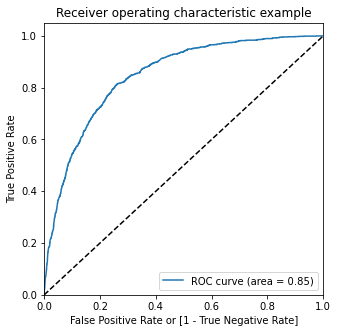

In [90]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

 Finding Optimal Cutoff Point

In [91]:
numbers = [float(x)/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [92]:
y_train_pred_final.Churn_Prob

0       0.250034
1       0.207984
2       0.698894
3       0.535728
4       0.655310
          ...   
4917    0.032098
4918    0.100306
4919    0.077083
4920    0.089899
4921    0.052018
Name: Churn_Prob, Length: 4922, dtype: float64

In [93]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.250034,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.207984,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.698894,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.535728,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.655310,2784,1,1,1,1,1,1,1,1,0,0,0


In [94]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.612962  0.942502  0.496286
0.2   0.2  0.719423  0.854701  0.671527
0.3   0.3  0.767980  0.777778  0.764512
0.4   0.4  0.795002  0.662005  0.842091
0.5   0.5  0.806380  0.533800  0.902889
0.6   0.6  0.796627  0.382284  0.943329
0.7   0.7  0.776310  0.202797  0.979367
0.8   0.8  0.749492  0.050505  0.996974
0.9   0.9  0.738521  0.000000  1.000000


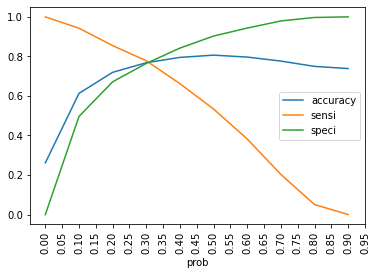

<Figure size 792x792 with 0 Axes>

In [95]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)
plt.figure(figsize=(11,11))
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [96]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.250034,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.207984,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.698894,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.535728,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.655310,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [97]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7679804957334417

In [98]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2779,  856],
       [ 286, 1001]], dtype=int64)

In [99]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [100]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7777777777777778

In [101]:
# Let us calculate specificity
TN / float(TN+FP)

0.7645116918844567

In [102]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23548830811554333


In [103]:
# Positive predictive value 
print (TP / float(TP+FP))

0.539041464728056


In [104]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9066884176182708


 Making predictions on the test set

In [105]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [106]:
X_test = X_test[col]
X_test.head()

,SeniorCitizen,tenure,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes
942,0,-0.347623,1,0,0,1,0,0,1,0,0,0,0
3730,0,0.999203,1,0,0,1,0,0,1,0,1,0,1
1761,0,1.040015,1,0,1,1,0,0,0,1,1,0,0
2283,0,-1.286319,1,0,0,0,0,1,1,0,0,0,0
1872,0,0.346196,0,0,1,0,0,0,0,1,0,0,0


In [107]:
X_test_sm = sm.add_constant(X_test)

In [108]:
y_test_pred = res.predict(X_test_sm)

In [109]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [110]:
# Let's see the head
y_pred_1.head()

,0
942,0.430420
3730,0.216630
1761,0.011624
2283,0.625914
1872,0.014727


In [111]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [112]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [113]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [114]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [115]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.430420
1,1,3730,0.216630
2,0,1761,0.011624
3,1,2283,0.625914
4,0,1872,0.014727


In [116]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [117]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [118]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.430420
1,3730,1,0.216630
2,1761,0,0.011624
3,2283,1,0.625914
4,1872,0,0.014727


In [119]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [120]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.430420,1
1,3730,1,0.216630,0
2,1761,0,0.011624,0
3,2283,1,0.625914,1
4,1872,0,0.014727,0


In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7843601895734598

In [122]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1295,  233],
       [ 222,  360]], dtype=int64)

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6185567010309279

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.8475130890052356

### Modellings using Naive Bayes Classifier

In [126]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train[col], y_train)

GaussianNB()

In [127]:
y_pred = gnb.predict(X_train[col])

y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [128]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred)))

Model accuracy score: 0.7517


##### For test data

In [129]:
y_pred = gnb.predict(X_test)

y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [130]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7346


In [131]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1116  412]
 [ 148  434]]

True Positives(TP) =  1116

True Negatives(TN) =  434

False Positives(FP) =  412

False Negatives(FN) =  148


<AxesSubplot:>

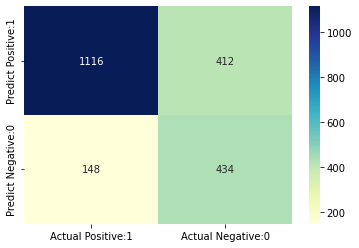

In [132]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [133]:
#Classification metrices
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1528
           1       0.51      0.75      0.61       582

    accuracy                           0.73      2110
   macro avg       0.70      0.74      0.70      2110
weighted avg       0.78      0.73      0.75      2110



###### Classification accuracy

In [134]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [135]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7346


In [136]:
#  classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2654


In [137]:
# precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7304


In [138]:
#Recall
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8829


In [139]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8829


In [140]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4870


In [141]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5130


In [142]:
# Let's see the sensitivity of our lmodel
sensitivity=TP / float(TP+FN)
sensitivity

0.8829113924050633

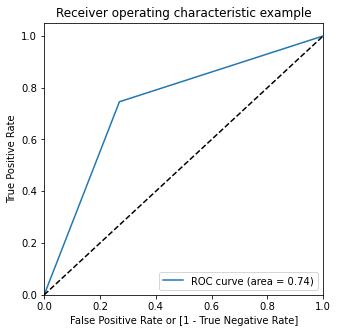

In [143]:
#ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( y_test, y_pred )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

k-Fold Cross Validation

In [144]:
# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train[col], y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.74442191 0.74239351 0.74593496 0.75813008 0.76219512 0.71747967
 0.74796748 0.77235772 0.7398374  0.7601626 ]


In [145]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7491


#### Modelling using kNN (k- Nearest Neighbors)

In [146]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [147]:
model.fit(X_train[col],y_train)

KNeighborsClassifier()

In [148]:
# predict the target on the train dataset
y_pred = model.predict(X_train[col])
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [149]:
trainaccuracy = accuracy_score(y_train,y_pred)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.8368549370174726


In [150]:
confusion = metrics.confusion_matrix(y_train, y_pred ) #predict_train / y_pred
print(confusion)

[[3326  309]
 [ 494  793]]


In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.6161616161616161

In [152]:
trainspecificity= TN / float(TN+FP)
trainspecificity

0.9149931224209078

In [153]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08500687757909216


In [154]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7196007259528131


Plotting the ROC Curve

In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

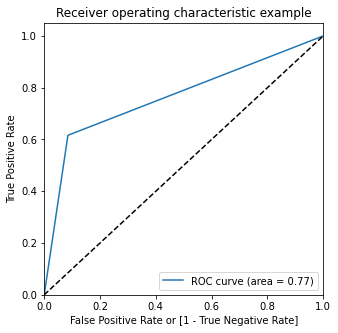

In [156]:
draw_roc(y_train,y_pred)

Precision and Recall

In [160]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,y_pred)

0.7196007259528131

In [161]:
recall_score(y_train,y_pred)

0.6161616161616161

Making predictions on the test set

In [162]:
predict_test = model.predict(X_test)
print('Target on test data\n\n',predict_test)

Target on test data

 [0 0 0 ... 0 1 0]


In [163]:
confusion2 = metrics.confusion_matrix(y_test, predict_test )
print(confusion2)

[[1303  225]
 [ 288  294]]


In [164]:
# Let's check the overall accuracy.
testaccuracy= accuracy_score(y_test,predict_test)
testaccuracy

0.7568720379146919

In [165]:
# Let's see the sensitivity of our lmodel
testsensitivity=TP / float(TP+FN)
testsensitivity

0.6161616161616161

In [166]:
# Let us calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

0.9149931224209078

In [167]:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Train Data Accuracy    :83.69 %
Train Data Sensitivity :61.62 %
Train Data Specificity :91.5 %
Test Data Accuracy     :75.69 %
Test Data Sensitivity  :61.62 %
Test Data Specificity  :91.5 %


# Conlclusion 
For Logistic Regression we found the Area under ROC to be 85% and accuracy on Test data to be 78.4%
-specificity is 84%
-sensitivity is 61%

For Naive Bayes Classifier we found the Area under ROC to be 74% and accuracy on Test data to be 73.4%
-Sensitivity  is 88 %
-Specificity  is 51%

For kNN (k- Nearest Neighbors we found the Area under ROC to be 77% and accuracy on Test data to be 75%
-Sensitivity  :61.62 %
-Specificity  :91.5 %